In [1]:
library(scRepertoire)

Loading required package: ggplot2

The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 



In [2]:
FT1 <- read.csv("/node200data/FTC/data/cellranger_multi_outs/FT1/outs/per_sample_outs/FT1/vdj_t/filtered_contig_annotations.csv")
FT2 <- read.csv("/node200data/FTC/data/cellranger_multi_outs/FT2/outs/per_sample_outs/FT2/vdj_t/filtered_contig_annotations.csv")
FT3 <- read.csv("/node200data/FTC/data/cellranger_multi_outs/FT3/outs/per_sample_outs/FT3/vdj_t/filtered_contig_annotations.csv")
FT4 <- read.csv("/node200data/FTC/data/cellranger_multi_outs/FT4/outs/per_sample_outs/FT4/vdj_t/filtered_contig_annotations.csv")
FT5 <- read.csv("/node200data/FTC/data/cellranger_multi_outs/FT5/outs/per_sample_outs/FT5/vdj_t/filtered_contig_annotations.csv")

contig_list <- list(FT1,FT2,FT3,FT4,FT5)

head(contig_list[[1]])
#data("contig_list") -> 넣지 않기

data(contig_list)

combined <- combineTCR(contig_list,
                      samples = c("FT1","FT2","FT3","FT4","FT5"),
                      cells = "T-AB",
                      ID = c("a","a","a","c","c"),
                      removeNA = T,
                      removeMulti = T)

,barcode,is_cell,contig_id,high_confidence,length,chain,v_gene,d_gene,j_gene,c_gene,⋯,fwr3_nt,cdr3,cdr3_nt,fwr4,fwr4_nt,reads,umis,raw_clonotype_id,raw_consensus_id,exact_subclonotype_id
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>
1,AAACCTGCACCGGAAA-1,true,AAACCTGCACCGGAAA-1_contig_1,true,485,TRB,TRBV24-1,,TRBJ1-5,TRBC1,⋯,ATAAACAAAGGAGAGATCTCTGATGGATACAGTGTCTCTCGACAGGCACAGGCTAAATTCTCCCTGTCCCTAGAGTCTGCCATCCCCAACCAGACAGCTCTTTACTTC,CATSDKYLNQPQHF,TGTGCCACCAGTGATAAATACCTCAATCAGCCCCAGCATTTT,GDGTRLSIL,GGTGATGGGACTCGACTCTCCATCCTAG,1673,3,clonotype34,clonotype34_consensus_1,1
2,AAACCTGCACCGGAAA-1,true,AAACCTGCACCGGAAA-1_contig_2,true,517,TRA,TRAV29/DV5,,TRAJ44,TRAC,⋯,AATGAAGATGGAAGATTCACTGTCTTCTTAAACAAAAGTGCCAAGCACCTCTCTCTGCACATTGTGCCCTCCCAGCCTGGAGACTCTGCAGTGTACTTC,CAAIRYTGTASKLTF,TGTGCAGCAATCCGCTATACCGGCACTGCCAGTAAACTCACCTTT,GTGTRLQVTL,GGGACTGGAACAAGACTTCAGGTCACGCTCG,1851,2,clonotype34,clonotype34_consensus_2,1
3,AAACCTGGTACTCAAC-1,true,AAACCTGGTACTCAAC-1_contig_1,true,667,TRA,TRAV8-2,,TRAJ22,TRAC,⋯,AAAGGCATCAACGGTTTTGAGGCTGAATTTAAGAAGAGTGAAACCTCCTTCCACCTGACGAAACCCTCAGCCCATATGAGCGACGCGGCTGAGTACTTC,CVVSEGGSARQLTF,TGTGTTGTGAGTGAGGGTGGTTCTGCAAGGCAACTGACCTTT,GSGTQLTVLP,GGATCTGGGACACAATTGACTGTTTTACCTG,935,3,clonotype35,clonotype35_consensus_3,4
4,AAACCTGGTCTCTTAT-1,true,AAACCTGGTCTCTTAT-1_contig_1,true,484,TRB,TRBV4-2,,TRBJ2-7,TRBC2,⋯,ACTGAAAACAACAGTGTGCCAAGTCGCTTCTCACCTGAATGCCCCAACAGCTCTCACTTATTCCTTCACCTACACACCCTGCAGCCAGAAGACTCGGCCCTGTATCTC,CASSQEIKRELIEQYF,TGTGCCAGCAGCCAAGAAATAAAACGGGAGTTGATCGAGCAGTACTTC,GPGTRLTVT,GGGCCGGGCACCAGGCTCACGGTCACAG,2990,4,clonotype1089,clonotype1089_consensus_2,1
5,AAACCTGGTCTCTTAT-1,true,AAACCTGGTCTCTTAT-1_contig_2,true,506,TRA,TRAV17,,TRAJ40,TRAC,⋯,AAACACAGTGGAAGATTAAGAGTCACGCTTGACACTTCCAAGAAAAGCAGTTCCTTGTTGATCACGGCTTCCCGGGCAGCAGACACTGCTTCTTACTTC,CATDAPSGTYKYIF,TGTGCTACGGACGCTCCCTCAGGAACCTACAAATACATCTTT,GTGTRLKVLA,GGAACAGGCACCAGGCTGAAGGTTTTAGCAA,2888,6,clonotype1089,clonotype1089_consensus_3,1
6,AAACCTGGTCTCTTAT-1,true,AAACCTGGTCTCTTAT-1_contig_3,true,514,TRB,TRBV11-2,TRBD1,TRBJ2-1,TRBC2,⋯,GTGGATGATTCACAGTTGCCTAAGGATCGATTTTCTGCAGAGAGGCTCAAAGGAGTAGACTCCACTCTCAAGATCCAGCCTGCAAAGCTTGAGGACTCGGCCGTGTATCTC,CASRDRQGANEQFF,TGTGCCAGCAGGGACCGACAGGGGGCTAATGAGCAGTTCTTC,GPGTRLTVL,GGGCCAGGGACACGGCTCACCGTGCTAG,5193,10,clonotype1089,clonotype1089_consensus_1,1


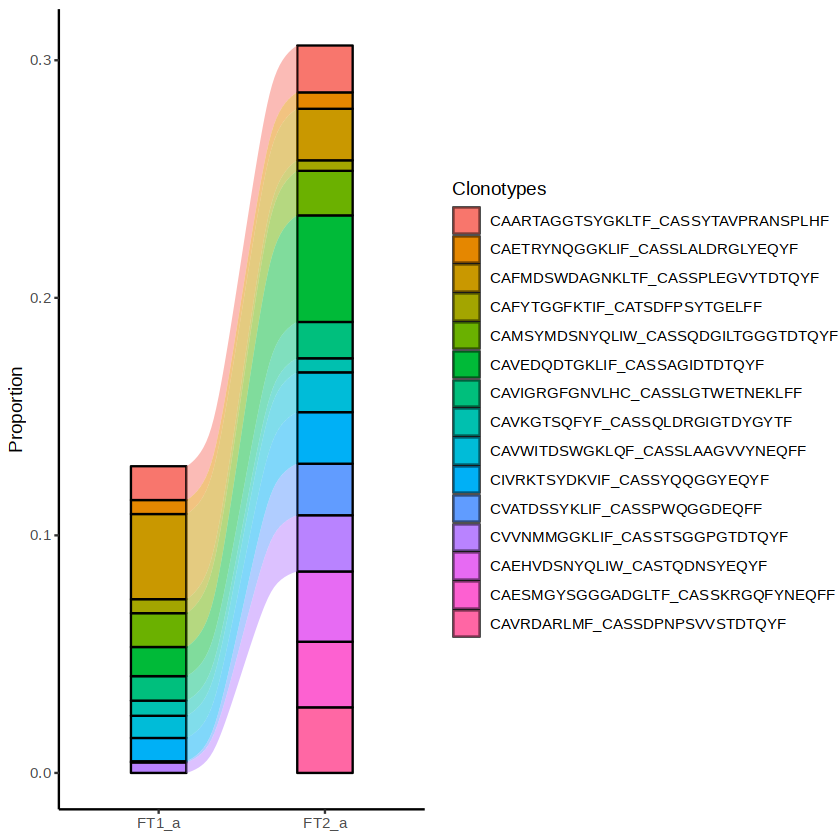

In [7]:
compareClonotypes(combined, 
                  numbers = 10, 
                  samples = c("FT1_a", "FT2_a"), 
                  cloneCall="aa", 
                  graph = "alluvial")

In [15]:
compareClonotypes(combined, 
                  numbers = 20, 
                  samples = c("FT1_a", "FT2_a"), 
                  cloneCall="aa", 
                  graph = "alluvial",
                 exportTable=TRUE)

,Clonotypes,Proportion,Sample
,<fct>,<dbl>,<chr>
46,CAAMPSGGYQKVTF_CASSYQGRLYGYTF,0.0019636721,FT1_a
84,CAARTAGGTSYGKLTF_CASSYTAVPRANSPLHF,0.0142366225,FT1_a
140,CAASKDKLVF_CASSQESGNTIYF,0.0024545901,FT1_a
202,CAASTSGGGNKLTF_CSVALGHHSYNEQFF,0.0019636721,FT1_a
297,CAESGGSYIPTF_CASSRTSGGADTQYF,0.0044182622,FT1_a
309,CAETRYNQGGKLIF_CASSLALDRGLYEQYF,0.0058910162,FT1_a
324,CAFMDSWDAGNKLTF_CASSPLEGVYTDTQYF,0.0358370152,FT1_a
355,CAFYTGGFKTIF_CATSDFPSYTGELFF,0.0058910162,FT1_a
655,CAMREGDTGGFKTIF_CASSEEGGRTGELFF,0.0049091802,FT1_a


In [18]:
shared1_2 <- compareClonotypes(combined, 
                  numbers = 20, 
                  samples = c("FT1_a", "FT2_a"), 
                  cloneCall="aa", 
                  graph = "alluvial",
                 exportTable=TRUE)

shared1 <- subset(shared1_2, subset=Sample=="FT1_a")
shared2 <- subset(shared1_2, subset=Sample=="FT2_a")
shared1
shared2
final_shared1_2 <- merge(shared1, shared2, by="Clonotypes")
final_shared1_2
nrow(final_shared1_2)

,Clonotypes,Proportion,Sample
,<fct>,<dbl>,<chr>
46,CAAMPSGGYQKVTF_CASSYQGRLYGYTF,0.001963672,FT1_a
84,CAARTAGGTSYGKLTF_CASSYTAVPRANSPLHF,0.014236622,FT1_a
140,CAASKDKLVF_CASSQESGNTIYF,0.002454590,FT1_a
202,CAASTSGGGNKLTF_CSVALGHHSYNEQFF,0.001963672,FT1_a
297,CAESGGSYIPTF_CASSRTSGGADTQYF,0.004418262,FT1_a
309,CAETRYNQGGKLIF_CASSLALDRGLYEQYF,0.005891016,FT1_a
324,CAFMDSWDAGNKLTF_CASSPLEGVYTDTQYF,0.035837015,FT1_a
355,CAFYTGGFKTIF_CATSDFPSYTGELFF,0.005891016,FT1_a
655,CAMREGDTGGFKTIF_CASSEEGGRTGELFF,0.004909180,FT1_a


,Clonotypes,Proportion,Sample
,<fct>,<dbl>,<chr>
1704,CAAMPSGGYQKVTF_CASSYQGRLYGYTF,0.0019723866,FT2_a
1718,CAARTAGGTSYGKLTF_CASSYTAVPRANSPLHF,0.0197238659,FT2_a
1771,CAASPGNQFYF_CASSLLTGADEQYF,0.0069033531,FT2_a
1787,CAASTSGGGNKLTF_CSVALGHHSYNEQFF,0.0004930966,FT2_a
1796,CAATIHPKTSYDKVIF_CSVEGSGQADTQYF,0.0073964497,FT2_a
1814,CAEHVDSNYQLIW_CASTQDNSYEQYF,0.0295857988,FT2_a
1844,CAESGGSYIPTF_CASSRTSGGADTQYF,0.0034516765,FT2_a
1849,CAESMGYSGGGADGLTF_CASSKRGQFYNEQFF,0.0276134122,FT2_a
1857,CAETRYNQGGKLIF_CASSLALDRGLYEQYF,0.0069033531,FT2_a


Clonotypes,Proportion.x,Sample.x,Proportion.y,Sample.y
<fct>,<dbl>,<chr>,<dbl>,<chr>
CAAMPSGGYQKVTF_CASSYQGRLYGYTF,0.001963672,FT1_a,0.0019723866,FT2_a
CAARTAGGTSYGKLTF_CASSYTAVPRANSPLHF,0.014236622,FT1_a,0.0197238659,FT2_a
CAASTSGGGNKLTF_CSVALGHHSYNEQFF,0.001963672,FT1_a,0.0004930966,FT2_a
CAESGGSYIPTF_CASSRTSGGADTQYF,0.004418262,FT1_a,0.0034516765,FT2_a
CAETRYNQGGKLIF_CASSLALDRGLYEQYF,0.005891016,FT1_a,0.0069033531,FT2_a
CAFMDSWDAGNKLTF_CASSPLEGVYTDTQYF,0.035837015,FT1_a,0.0216962525,FT2_a
CAFYTGGFKTIF_CATSDFPSYTGELFF,0.005891016,FT1_a,0.0044378698,FT2_a
CAMREGDTGGFKTIF_CASSEEGGRTGELFF,0.004909180,FT1_a,0.0083826430,FT2_a
CAMSYMDSNYQLIW_CASSQDGILTGGGTDTQYF,0.014236622,FT1_a,0.0187376726,FT2_a


[1] 20

In [32]:
shared1_2 <- compareClonotypes(combined, 
                  numbers = 100000, 
                  samples = c("FT1_a", "FT2_a"), 
                  cloneCall="aa", 
                  graph = "alluvial",
                 exportTable=TRUE)

shared1 <- subset(shared1_2, subset=Sample=="FT1_a")
shared2 <- subset(shared1_2, subset=Sample=="FT2_a")
shared1
shared2
final_shared1_2 <- merge(shared1, shared2, by="Clonotypes")
final_shared1_2
nrow(final_shared1_2)

,Clonotypes,Proportion,Sample
,<fct>,<dbl>,<chr>
1,CAAAETSGSRLTF_CASSHGRAGYNEQFF,0.000490918,FT1_a
2,CAAAILSSGSARQLTF_CASSSGPQETQYF,0.000490918,FT1_a
3,CAAATGTASKLTF_CASSQISPTEAFF,0.000490918,FT1_a
4,CAADTGFQKLVF_CASSFGANEKLFF,0.000490918,FT1_a
5,CAAEGNQFYF_CASSKRGGSTDTQYF,0.000490918,FT1_a
6,CAAEGPGANNLFF_CASSFGSYNEQFF,0.000490918,FT1_a
7,CAAEHRQAGTALIF_CASSLVQEDTIYF,0.000490918,FT1_a
8,CAAEPPLGLTF_CASKSRGYEQYF,0.000490918,FT1_a
9,CAAETNAGKSTF_CASSFGGIGETQYF,0.000490918,FT1_a


,Clonotypes,Proportion,Sample
,<fct>,<dbl>,<chr>
1680,CAAAGTALIF_CASSPGTSSYNEQFF,0.0004930966,FT2_a
1681,CAAARVQTGANNLFF_CASSLSSVGTYEQYF,0.0024654832,FT2_a
1682,CAAATYSGAGSYQLTF_CASCRDRAAEAFF,0.0004930966,FT2_a
1683,CAACRISGGYNKLIF_CASSLGQGATGELFF,0.0004930966,FT2_a
1684,CAAESPNTGFQKLVF_CASSQNNNEQFF,0.0004930966,FT2_a
1685,CAAFTPSGFQKLVF_CASNGGGYEQYF,0.0014792899,FT2_a
1686,CAAGNTNAGKSTF_CASSLSWGEQYF,0.0004930966,FT2_a
1687,CAAGQSFGNEKLTF_CASRANRGPSPLHF,0.0004930966,FT2_a
1688,CAAHNARLMF_CASSKTGLNTEAFF,0.0004930966,FT2_a


Clonotypes,Proportion.x,Sample.x,Proportion.y,Sample.y
<fct>,<dbl>,<chr>,<dbl>,<chr>
CAAMPSGGYQKVTF_CASSYQGRLYGYTF,0.001963672,FT1_a,0.0019723866,FT2_a
CAAQGDSYSGAGSYQLTF_CSARDPDLPNTGELFF,0.000490918,FT1_a,0.0009861933,FT2_a
CAARTAGGTSYGKLTF_CASSYTAVPRANSPLHF,0.014236622,FT1_a,0.0197238659,FT2_a
CAASARNTGNQFYF_CASSEERGAGDTQYF,0.000490918,FT1_a,0.0004930966,FT2_a
CAASEQYSGGGADGLTF_CASTLQTTGNEQFF,0.000490918,FT1_a,0.0019723866,FT2_a
CAASPSGTYKYIF_CSVALGHHSYNEQFF,0.000981836,FT1_a,0.0004930966,FT2_a
CAASSRGSTLGRLYF_CASSFTSVADTQYF,0.000981836,FT1_a,0.0009861933,FT2_a
CAASTSGGGNKLTF_CSVALGHHSYNEQFF,0.001963672,FT1_a,0.0004930966,FT2_a
CAERGDTGRRALTF_CASSLGGGGQPQHF,0.000490918,FT1_a,0.0009861933,FT2_a


[1] 54

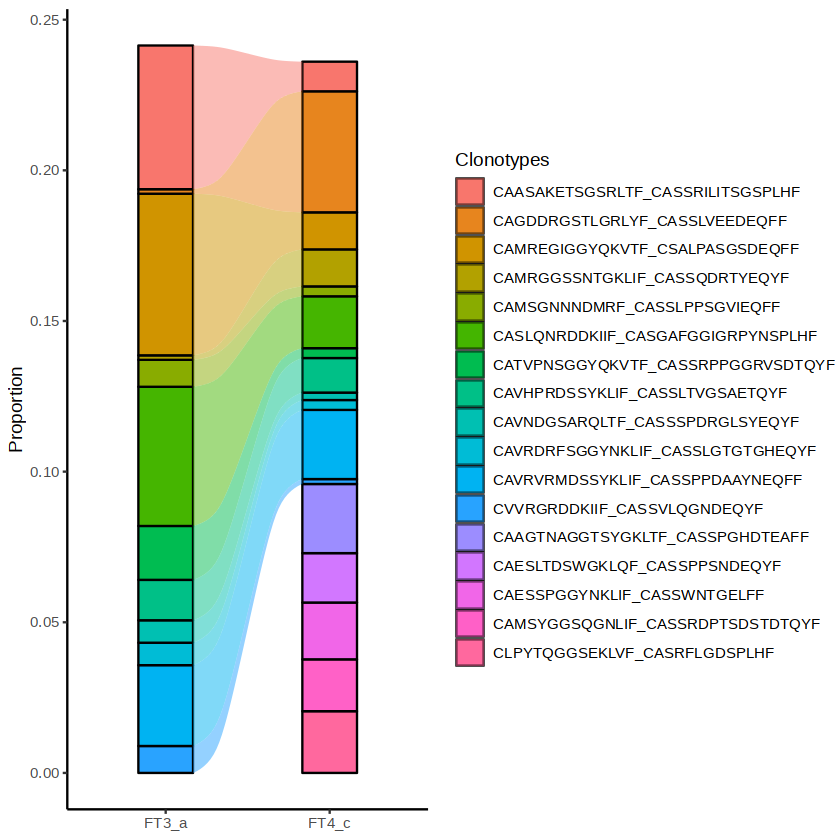

In [9]:
compareClonotypes(combined, 
                  numbers = 10, 
                  samples = c("FT3_a", "FT4_c"), 
                  cloneCall="aa", 
                  graph = "alluvial")

In [20]:
shared3_4 <- compareClonotypes(combined, 
                  numbers = 20, 
                  samples = c("FT3_a", "FT4_c"), 
                  cloneCall="aa", 
                  graph = "alluvial",
                 exportTable=TRUE)

shared3 <- subset(shared3_4, subset=Sample=="FT3_a")
shared4 <- subset(shared3_4, subset=Sample=="FT4_c")
shared3
shared4
final_shared3_4 <- merge(shared3, shared4, by="Clonotypes")
final_shared3_4
nrow(final_shared3_4)

,Clonotypes,Proportion,Sample
,<fct>,<dbl>,<chr>
2606,CAAKKEGNMLTF_CASRETAIYEQYF,0.002980626,FT3_a
2626,CAASAKETSGSRLTF_CASSRILITSGSPLHF,0.047690015,FT3_a
2700,CAGDDRGSTLGRLYF_CASSLVEEDEQFF,0.001490313,FT3_a
2721,CAGQLNSGGYQKVTF_CASSFEGALDTQYF,0.002980626,FT3_a
2755,CALSDYRGSQGNLIF_CASSSTRNTDTEAFF,0.002980626,FT3_a
2782,CAMREGIGGYQKVTF_CSALPASGSDEQFF,0.053651267,FT3_a
2793,CAMRGGSSNTGKLIF_CASSQDRTYEQYF,0.001490313,FT3_a
2800,CAMSGNNNDMRF_CASSLPPSGVIEQFF,0.008941878,FT3_a
2803,CAMSPASGGSYIPTF_CASSLMGLNYEQYF,0.002980626,FT3_a


,Clonotypes,Proportion,Sample
,<fct>,<dbl>,<chr>
3091,CAAGTNAGGTSYGKLTF_CASSPGHDTEAFF,0.0229508197,FT4_c
3097,CAAKKEGNMLTF_CASRETAIYEQYF,0.0008196721,FT4_c
3112,CAASAKETSGSRLTF_CASSRILITSGSPLHF,0.0098360656,FT4_c
3143,CAASNNNDMRF_CASSEGSLRYGYTF,0.0090163934,FT4_c
3182,CAESLTDSWGKLQF_CASSPPSNDEQYF,0.0163934426,FT4_c
3185,CAESSPGGYNKLIF_CASSWNTGELFF,0.0188524590,FT4_c
3206,CAGDDRGSTLGRLYF_CASSLVEEDEQFF,0.0401639344,FT4_c
3228,CAGQLNSGGYQKVTF_CASSFEGALDTQYF,0.0016393443,FT4_c
3288,CALSLSGGYNKLIF_CASSFSRALQETQYF,0.0114754098,FT4_c


Clonotypes,Proportion.x,Sample.x,Proportion.y,Sample.y
<fct>,<dbl>,<chr>,<dbl>,<chr>
CAAKKEGNMLTF_CASRETAIYEQYF,0.002980626,FT3_a,0.0008196721,FT4_c
CAASAKETSGSRLTF_CASSRILITSGSPLHF,0.047690015,FT3_a,0.0098360656,FT4_c
CAGDDRGSTLGRLYF_CASSLVEEDEQFF,0.001490313,FT3_a,0.0401639344,FT4_c
CAGQLNSGGYQKVTF_CASSFEGALDTQYF,0.002980626,FT3_a,0.0016393443,FT4_c
CAMREGIGGYQKVTF_CSALPASGSDEQFF,0.053651267,FT3_a,0.0122950820,FT4_c
CAMRGGSSNTGKLIF_CASSQDRTYEQYF,0.001490313,FT3_a,0.0122950820,FT4_c
CAMSGNNNDMRF_CASSLPPSGVIEQFF,0.008941878,FT3_a,0.0032786885,FT4_c
CAMSPASGGSYIPTF_CASSLMGLNYEQYF,0.002980626,FT3_a,0.0024590164,FT4_c
CASLQNRDDKIIF_CASGAFGGIGRPYNSPLHF,0.046199702,FT3_a,0.0172131148,FT4_c


[1] 22

In [29]:
shared3_4 <- compareClonotypes(combined, 
                  numbers = 1000000, 
                  samples = c("FT3_a", "FT4_c"), 
                  cloneCall="aa", 
                  graph = "alluvial",
                 exportTable=TRUE)

shared3 <- subset(shared3_4, subset=Sample=="FT3_a")
shared4 <- subset(shared3_4, subset=Sample=="FT4_c")
shared3
shared4
final_shared3_4 <- merge(shared3, shared4, by="Clonotypes")
final_shared3_4
nrow(final_shared3_4)

,Clonotypes,Proportion,Sample
,<fct>,<dbl>,<chr>
2593,CAAAGGGTSYGKLTF_CASSAGASPLHF,0.001490313,FT3_a
2594,CAAAKTSGSRLTF_CASSLVAAEQFF,0.001490313,FT3_a
2595,CAAANQAGTALIF_CASSSLSSDTQYF,0.001490313,FT3_a
2596,CAADSNAGKSTF_CASRKTVSVNGYTF,0.001490313,FT3_a
2597,CAAGGGADGLTF_CASSLGPGGYTF,0.001490313,FT3_a
2598,CAAGGTSYGKLTF_CASMDRRAINEKLFF,0.001490313,FT3_a
2599,CAAGIIF_CASSLISAGTGNEQYF,0.001490313,FT3_a
2600,CAAGLMYSGGGADGLTF_CASSVAHEQFF,0.001490313,FT3_a
2601,CAAGVETSGSRLTF_CSANQLQGSSYEQYF,0.001490313,FT3_a


,Clonotypes,Proportion,Sample
,<fct>,<dbl>,<chr>
3086,CAAAVGGGADGLTF_CASSPSGDYTF,0.0008196721,FT4_c
3087,CAADTGGFKTIF_CASRESYEQYF,0.0008196721,FT4_c
3088,CAAEDSGGGADGLTF_CASSEGIEYF,0.0008196721,FT4_c
3089,CAAGGKLIF_CATKGQGDEKLFF,0.0040983607,FT4_c
3090,CAAGPHFNKFYF_CASIGQDFYNEQFF,0.0008196721,FT4_c
3091,CAAGTNAGGTSYGKLTF_CASSPGHDTEAFF,0.0229508197,FT4_c
3092,CAAGTNAGGTSYGKLTF_CASSYDEGVTEAFF,0.0008196721,FT4_c
3093,CAAHAGMDSNYQLIW_CASSGAFYEQYF,0.0049180328,FT4_c
3094,CAAIISGNTGKLIF_CASSQIGQGNNEQFF,0.0008196721,FT4_c


Clonotypes,Proportion.x,Sample.x,Proportion.y,Sample.y
<fct>,<dbl>,<chr>,<dbl>,<chr>
CAAKKEGNMLTF_CASRETAIYEQYF,0.002980626,FT3_a,0.0008196721,FT4_c
CAALNQGGKLIF_CASSSEQGVINYGYTF,0.001490313,FT3_a,0.0024590164,FT4_c
CAANQAGTALIF_CASSHRLAGERDTQYF,0.001490313,FT3_a,0.0008196721,FT4_c
CAARRAGQKLLF_CASSEGMNTEAFF,0.001490313,FT3_a,0.0016393443,FT4_c
CAASAKETSGSRLTF_CASSRILITSGSPLHF,0.047690015,FT3_a,0.0098360656,FT4_c
CAASDPSYDKVIF_CASSLNRGLDTGELFF,0.001490313,FT3_a,0.0008196721,FT4_c
CAASEGYTGNQFYF_CASSFGTGSIEQYF,0.001490313,FT3_a,0.0008196721,FT4_c
CAESIDTDKLIF_CASKREVSYEQYF,0.001490313,FT3_a,0.0008196721,FT4_c
CAESPTDSWGKLQF_CASSLAGGPYNEQFF,0.001490313,FT3_a,0.0024590164,FT4_c


[1] 47

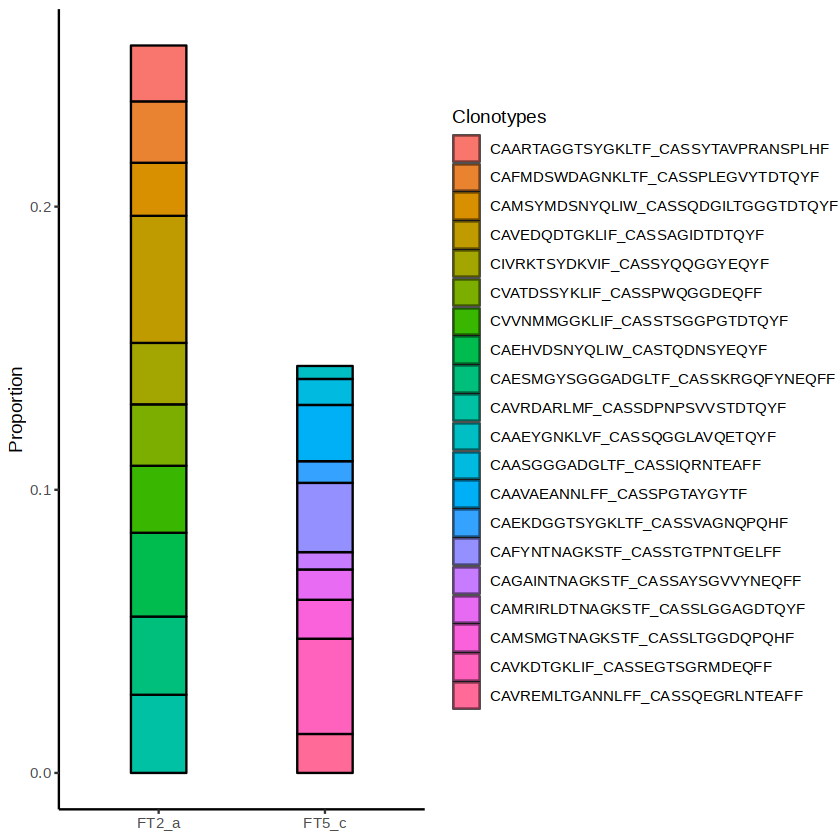

In [23]:
compareClonotypes(combined, 
                  numbers = 10, 
                  samples = c("FT2_a", "FT5_c"), 
                  cloneCall="aa", 
                  graph = "alluvial")

In [33]:
shared2_5 <- compareClonotypes(combined, 
                  numbers = 1000000, 
                  samples = c("FT2_a", "FT5_c"), 
                  cloneCall="aa", 
                  graph = "alluvial",
                 exportTable=TRUE)

shared2 <- subset(shared2_5, subset=Sample=="FT2_a")
shared5 <- subset(shared2_5, subset=Sample=="FT5_c")
shared2
shared5
final_shared2_5 <- merge(shared2, shared5, by="Clonotypes")
final_shared2_5
nrow(final_shared2_5)

,Clonotypes,Proportion,Sample
,<fct>,<dbl>,<chr>
1680,CAAAGTALIF_CASSPGTSSYNEQFF,0.0004930966,FT2_a
1681,CAAARVQTGANNLFF_CASSLSSVGTYEQYF,0.0024654832,FT2_a
1682,CAAATYSGAGSYQLTF_CASCRDRAAEAFF,0.0004930966,FT2_a
1683,CAACRISGGYNKLIF_CASSLGQGATGELFF,0.0004930966,FT2_a
1684,CAAESPNTGFQKLVF_CASSQNNNEQFF,0.0004930966,FT2_a
1685,CAAFTPSGFQKLVF_CASNGGGYEQYF,0.0014792899,FT2_a
1686,CAAGNTNAGKSTF_CASSLSWGEQYF,0.0004930966,FT2_a
1687,CAAGQSFGNEKLTF_CASRANRGPSPLHF,0.0004930966,FT2_a
1688,CAAHNARLMF_CASSKTGLNTEAFF,0.0004930966,FT2_a


,Clonotypes,Proportion,Sample
,<fct>,<dbl>,<chr>
3692,CAAAPRGAGSYQLTF_CASSQAGQAFF,0.001529052,FT5_c
3693,CAACRDLSGSARQLTF_CASSLERGTYEQYF,0.001529052,FT5_c
3694,CAAEYGNKLVF_CASSQGGLAVQETQYF,0.004587156,FT5_c
3695,CAAGGMDSSYKLIF_CASSLDRSTTGELFF,0.001529052,FT5_c
3696,CAAGNQGGKLIF_CASSPRTGNNQPQHF,0.001529052,FT5_c
3697,CAAGSGGYQKVTF_CASSTYGTGESPLHF,0.001529052,FT5_c
3698,CAAGSGTNAGKSTF_CASSSDSRSPYNSPLHF,0.001529052,FT5_c
3699,CAAGSQGNLIF_CASGGQGPYEQYF,0.001529052,FT5_c
3700,CAAHKGNTGNQFYF_CASSPSTGRGPGANVLTF,0.001529052,FT5_c


Clonotypes,Proportion.x,Sample.x,Proportion.y,Sample.y
<fct>,<dbl>,<chr>,<dbl>,<chr>


[1] 0

In [34]:
shared1_3 <- compareClonotypes(combined, 
                  numbers = 1000000, 
                  samples = c("FT1_a", "FT3_a"), 
                  cloneCall="aa", 
                  graph = "alluvial",
                 exportTable=TRUE)

shared1 <- subset(shared1_3, subset=Sample=="FT1_a")
shared3 <- subset(shared1_3, subset=Sample=="FT3_a")
shared1
shared3
final_shared1_3 <- merge(shared1, shared3, by="Clonotypes")
final_shared1_3
nrow(final_shared1_3)

,Clonotypes,Proportion,Sample
,<fct>,<dbl>,<chr>
1,CAAAETSGSRLTF_CASSHGRAGYNEQFF,0.000490918,FT1_a
2,CAAAILSSGSARQLTF_CASSSGPQETQYF,0.000490918,FT1_a
3,CAAATGTASKLTF_CASSQISPTEAFF,0.000490918,FT1_a
4,CAADTGFQKLVF_CASSFGANEKLFF,0.000490918,FT1_a
5,CAAEGNQFYF_CASSKRGGSTDTQYF,0.000490918,FT1_a
6,CAAEGPGANNLFF_CASSFGSYNEQFF,0.000490918,FT1_a
7,CAAEHRQAGTALIF_CASSLVQEDTIYF,0.000490918,FT1_a
8,CAAEPPLGLTF_CASKSRGYEQYF,0.000490918,FT1_a
9,CAAETNAGKSTF_CASSFGGIGETQYF,0.000490918,FT1_a


,Clonotypes,Proportion,Sample
,<fct>,<dbl>,<chr>
2593,CAAAGGGTSYGKLTF_CASSAGASPLHF,0.001490313,FT3_a
2594,CAAAKTSGSRLTF_CASSLVAAEQFF,0.001490313,FT3_a
2595,CAAANQAGTALIF_CASSSLSSDTQYF,0.001490313,FT3_a
2596,CAADSNAGKSTF_CASRKTVSVNGYTF,0.001490313,FT3_a
2597,CAAGGGADGLTF_CASSLGPGGYTF,0.001490313,FT3_a
2598,CAAGGTSYGKLTF_CASMDRRAINEKLFF,0.001490313,FT3_a
2599,CAAGIIF_CASSLISAGTGNEQYF,0.001490313,FT3_a
2600,CAAGLMYSGGGADGLTF_CASSVAHEQFF,0.001490313,FT3_a
2601,CAAGVETSGSRLTF_CSANQLQGSSYEQYF,0.001490313,FT3_a


Clonotypes,Proportion.x,Sample.x,Proportion.y,Sample.y
<fct>,<dbl>,<chr>,<dbl>,<chr>


[1] 0

#overlap되는 clonotype은 1-2, 3-4간에만 존재하며, 각각 54, 47개 존재